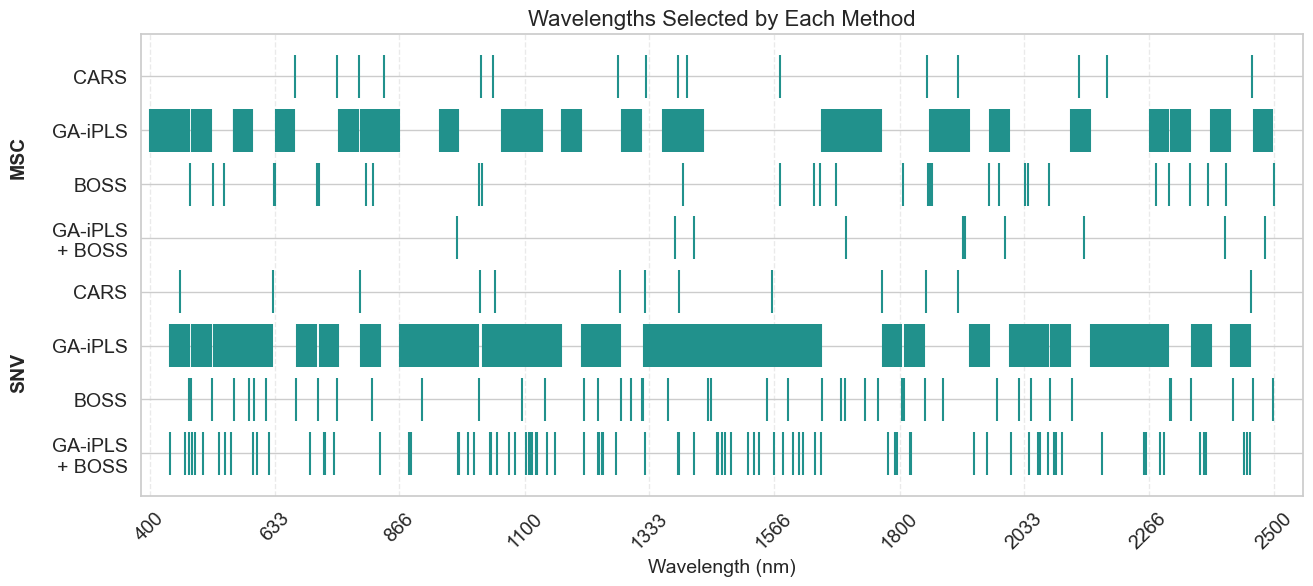

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to expand wavelength ranges (e.g., "1000-1003")
def expand_ranges(wavelengths):
    expanded = set()
    for w in wavelengths:
        if isinstance(w, str) and '-' in w:
            start, end = map(int, w.split('-'))
            expanded.update(range(start, end + 1))
        else:
            expanded.add(int(w))
    return expanded

# Wavelength selection data from the table
wavelengths_info = {
    "SG + MSC - CARS": [803, 944, 979, 1013, 1129, 1167, 1320, 1389, 1423, 1453, 1552, 1819, 1878, 2089, 2119, 2413],
    "SG + MSC - GA-iPLS": ["400-441", "526-546", "652-672", "778-798", "946-966", "988-1029", "1072-1092", 
                           "1177-1197", "1219-1239", "1261-1281", "1345-1365", "1408-1428", "1450-1470",
                           "1597-1617", "1639-1680", "1849-1890", "1954-1974", "2080-2100", "2206-2226",
                           "2248-2268", "2353-2373", "2437-2457"],
    "SG + MSC - BOSS": [460, 564, 579, 738, 740, 899, 911, 993, 1001, 1127, 1153, 1441, 1552, 1589, 1595, 1612,
                        1758, 1821, 1825, 1836, 1851, 1930, 1963, 1991, 1994, 2033, 2213, 2227, 2268, 2349, 2368, 2494],
    "SG + MSC - GA-iPLS + BOSS": [1091, 1420, 1461, 1643, 1884, 1886, 1970, 2094, 2367, 2449],
    "SG + SNV - CARS": [432, 736, 981, 1128, 1169, 1323, 1388, 1425, 1544, 1704, 1818, 1878, 2410],
    "SG + SNV - GA-iPLS": ["421-441", "526-546", "568-588", "652-672", "715-735", "862-882", "925-945",
                           "988-1008", "1030-1113", "1156-1197", "1219-1260", "1282-1323", "1387-1428",
                           "1450-1596", "1723-1743", "1786-1806", "1891-1911", "1975-2016", "2059-2079",
                           "2101-2121", "2164-2226", "2332-2352", "2374-2394"],
    "SG + SNV - BOSS": [445, 499, 563, 653, 668, 716, 729, 807, 904, 943, 1000, 1053, 1127, 1217, 1242,
                        1284, 1299, 1339, 1354, 1368, 1379, 1413, 1476, 1479, 1538, 1561, 1597, 1626, 1642,
                        1663, 1677, 1749, 1762, 1812, 1862, 1961, 1984, 1997, 2038, 2081, 2236, 2248, 2315,
                        2376, 2429, 2480],
    "SG + SNV - GA-iPLS + BOSS": [421, 437, 441, 526, 529, 537, 573, 580, 586, 715, 719, 732, 876, 930, 931, 
                                  940, 1008, 1039, 1041, 1092, 1093, 1102, 1109, 1164, 1165, 1171, 1184, 1190,
                                  1222, 1225, 1228, 1229, 1233, 1234, 1245, 1253, 1284, 1299, 1300, 1303, 1304,
                                  1318, 1388, 1424, 1425, 1461, 1485, 1486, 1490, 1494, 1500, 1518, 1525, 1530,
                                  1546, 1556, 1566, 1573, 1577, 1590, 1596, 1729, 1736, 1738, 1791, 1792, 1895,
                                  1909, 1976, 1995, "2005-2007", 2015, 2062, 2064, 2070, 2113, 2200, 2202,
                                  2217, 2221, 2341, "2345-2347", 2388, 2391, 2394]
}

# Expand all wavelengths
expanded_data = {k: expand_ranges(v) for k, v in wavelengths_info.items()}
all_selected_wavelengths = set().union(*expanded_data.values())
wavelength_range = sorted(all_selected_wavelengths)
wavelength_indices = {w: i for i, w in enumerate(wavelength_range)}

# Order and label adjustment
preprocessing_labels = ["MSC", "SNV"]
preprocessing_bounds = [0, 4, 8]
desired_order = ["CARS", "GA-iPLS", "BOSS", "GA-iPLS + BOSS"]
msc_keys = [k for k in expanded_data if "MSC" in k]
snv_keys = [k for k in expanded_data if "SNV" in k]
msc_sorted = sorted(msc_keys, key=lambda k: desired_order.index(k.split(" - ")[1]))
snv_sorted = sorted(snv_keys, key=lambda k: desired_order.index(k.split(" - ")[1]))
final_order = list(reversed(msc_sorted + snv_sorted))
expanded_data_reversed = {k: expanded_data[k] for k in final_order}
short_labels_reversed = [k.split(" - ")[1].replace("GA-iPLS + BOSS", "GA-iPLS\n+ BOSS") for k in final_order]

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
font_size = 14
uniform_color = sns.color_palette("viridis", n_colors=1)[0]

for i, (label, selected_set) in enumerate(expanded_data_reversed.items()):
    x_vals = [wavelength_indices[w] for w in selected_set]
    plt.vlines(x=x_vals, ymin=i - 0.4, ymax=i + 0.4, color=uniform_color)

# Add preprocessing labels (MSC/SNV)
label_offset = -140
for idx, group in enumerate(preprocessing_labels[::-1]):
    start = preprocessing_bounds[::-1][idx + 1]
    end = preprocessing_bounds[::-1][idx]
    mid_point = (len(expanded_data_reversed) - end + len(expanded_data_reversed) - start - 1) / 2
    plt.text(label_offset, mid_point, group, va='center', ha='center',
             rotation=90, fontsize=font_size, weight='bold')

# Axis configuration
plt.yticks(range(len(expanded_data_reversed)), short_labels_reversed, fontsize=font_size)
plt.xticks(
    ticks=np.linspace(0, len(wavelength_range) - 1, 10, dtype=int),
    labels=np.linspace(min(wavelength_range), 2500, 10, dtype=int),
    rotation=45,
    fontsize=font_size
)
plt.xlabel("Wavelength (nm)", fontsize=font_size)
plt.title("Wavelengths Selected by Each Method", fontsize=font_size + 2)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xlim(-10, len(wavelength_range) + 30)

# Save as PDF
plt.savefig("plots/wavelength_selection_barcode_extra_margin.pdf", format='pdf', bbox_inches='tight')
plt.show()
plt.close()